# <center>L2 Computational Physics</center>

## <center>Week 3: Differential Equations I</center>

In [1]:
# usual packages to import
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

In this notebook, you will generate and plot the decay curve for Iodine-133 analytically and numerically. $^{133}\textrm{I}$ has a half life $t_{1/2}$ of 20.8 hours. This means that half of the nuclei will have decayed after time $t_{1/2}$. Derive the mean lifetime $\tau$ from that information.

In [2]:
# define a function to calculate the mean lifetime from the half life
def meanLifetime(halfLife):
    return halfLife/numpy.log(2)
T_HALF = 20.8
TAU = meanLifetime(T_HALF)


Check your average lifetime:

In [3]:
# this test is worth 1 mark
assert numpy.isclose(TAU, 30.0080568505)         

### The Decay Equation

Implement the function `f_rad` such that the differential equation 

$$ \frac{dN}{dt} = f_{rad}(N,t)$$

describes the radioactive decay process.

- *Your function should return values using hours as the time unit.*
- *The function should use the constant* `TAU`.

In [4]:
def f_rad(N, t):
    return -N/TAU

Make sure your function works:

In [5]:
# this test cell is worth 1 mark
assert numpy.isclose(f_rad(1000, 0), -33.324383681)           

Solve this first order, ordinary differential equation analytically. Implement this function below, naming it `analytic`. The function should take an initial number of atoms `N0` at time `t=0`, and a time argument. The function should return nuclei count at the time argument. Make sure the function also works for numpy arrays.

In [6]:
def analytic(N0, t):
    return N0*numpy.exp(-t/TAU)

Check your answer for a single time:

In [7]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, 41.6), 250.0)           

In [8]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, numpy.arange(0, 60, 6)), 
                     [1000.        ,  818.77471839,  670.39203948,  548.90005334,
                       449.4254866 ,  367.97822623,  301.29126855,  246.68967356,
                       201.983268  ,  165.37879338]).all()


## Numerically Solving the ODE

We now wish to solve our differential equation numerically. We shall do this using Euler's and RK4 methods.

### Euler's Method

Create a function which takes as its arguments the initial number of atoms, `n0`, the initial time `t0`, the time step, `dt`, and the number of steps to perform, `n_steps`.  This function should return an array of the number of counts at each time step using Euler's method. This array should contain the initial and final values, so the array length should be `n_steps+1` 

In [9]:
def solve_euler(f, n0, t0, dt, n_steps):
    N=[]
    N.append(n0)
    t=t0
    for i in range (0,n_steps):
        N.append(N[i] +(f(N[i],t)*dt))
        t=t+dt
    return N


Try your solution:

In [10]:
# this test is worth 1 mark
assert len(solve_euler(f_rad, 1000, 0, 1, 17)) == 18

In [11]:
# this test is worth 2 marks
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 1), [1000.,  800.05369792]).all()

In [12]:
# this test is worth 2 mark
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 10), [1000.        ,  800.05369792,  640.08591955,  512.10310692,
                                                409.7099844 ,  327.7899881 ,  262.24959212,  209.81375595,
                                                167.86227132,  134.29883091,  107.4462763 ]).all()

### RK 4 method

Implement the RK4 method in the `solve_RK4` function. The arguments are the same as for `solve_euler`.

In [70]:
def solve_RK4(f, n0, t0, dt, nsteps):
    N=[]
    N.append(n0)
    t=t0
    k=0
    for i in range (0,nsteps):
        k1=f(N[i],t)
        t=t+(dt/2)
        k2=f(N[i]+k1*dt/2,t)
        k3=f(N[i]+(k2*dt/2),t)
        t=t+(dt/2)
        k4=f(N[i]+k3*dt,t)
        k= (k1+2*k2+2*k3+k4)/6
        N.append(N[i] + k*dt)
       
    return N


In [71]:
# This checks that we return an array of the right length
# this test is worth 1 mark
assert len(solve_RK4(f_rad, 1000, 0, 1, 17)) == 18

In [72]:
# This checks that a single step is working
# this test is worth 2 mark
assert numpy.isclose(solve_RK4(f_rad, 1000,0, 6, 1), [1000.,  818.7773]).all()

In [73]:
# This checks multiple steps
# this test is worth 2 marks
assert numpy.isclose(solve_RK4(f_rad, 1000, 0, 6, 10), [
    1000.,
    818.77729521,  
    670.39625915,  
    548.90523578,
    449.43114428,  
    367.9840167,  
    301.29695787,  
    246.69510822, 
    201.98835345,  
    165.3834777,  
    135.41223655]).all()

## Plotting task

**Task 1: **

Create a plot to show that the RK4 method has an error that scales better with the number of steps than the Euler method. (click on the "+" button to create new cells.)       [task worth 5 marks]


716.6278728326351
716.5972033130384
716.5957729154235
716.5955432711036
716.5954820173048
716.5954603403779
716.5954511415911
716.5954467096317
716.5954443640788
716.5954430295767
716.595442225376
716.5954417175233
716.5954413841072
716.5954411579188
716.5954410001115
716.5954408873113
716.595440804956
716.5954407436965
716.5954406973676
716.5954406618081
716.5954406341483
716.595440612373
716.595440595042
716.5954405811091
716.5954405698063
716.5954405605588
716.5954405529347
716.5954405466033
716.5954405413102
716.595440536858
716.5954405330908
716.5954405298864
716.5954405271467
716.595440524793
716.5954405227624
716.5954405210025
716.5954405194709
716.5954405181338
716.5954405169618
716.595440515931
716.5954405150213
716.5954405142169
716.5954405135025
716.595440512867
716.5954405122997
716.595440511792
716.5954405113372
716.5954405109272
716.5954405105588
716.5954405102262
716.595440509925
716.5954405096523
716.595440509404
716.5954405091786
716.5954405089732
716.5954405087856
716

716.5954405062778
716.5954405062776
716.5954405062778
716.5954405062781
716.5954405062781
716.5954405062785
716.5954405062776
716.5954405062781
716.5954405062777
716.5954405062791
716.5954405062774
716.5954405062774
716.5954405062779
716.5954405062781
716.5954405062784
716.5954405062778
716.5954405062786
716.595440506277
716.595440506277
716.5954405062778
716.5954405062777
716.595440506279
716.5954405062784
716.5954405062778
716.5954405062782
716.5954405062794
716.5954405062777
716.595440506279
716.5954405062761
716.5954405062793
716.5954405062774
716.5954405062786
716.5954405062786
716.5954405062795
716.5954405062774
716.5954405062787
716.5954405062773
716.5954405062781
716.595440506278
716.5954405062778
716.5954405062781
716.5954405062776
716.5954405062776
716.5954405062789
716.5954405062782
716.5954405062768
716.5954405062788
716.5954405062782
716.5954405062786
716.5954405062779
716.5954405062781
716.5954405062781
716.5954405062777
716.5954405062777
716.5954405062773
716.59544050627

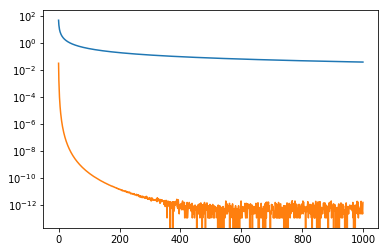

In [115]:
real= n0*numpy.exp(-10/TAU)
def solve_euler2(f, n0, t0, dt, nstep):
    N=n0
    t=t0
    for i in range (0,nstep):
        N=N +(f(N,t)*(100*(dt / nstep)))
        t=t+((100*dt) / nstep)
    return N
def solve_RK42(f, n0, t0, dt, nstep):
    N=n0
    t=t0
    k=0
    for i in range (0,nstep):
        k1=f(N,t)
        t=t+(100*dt/(2*nstep))
        k2=f(N+(k1*100*dt)/(2*nstep),t)
        k3=f(N+(k2*100*dt)/(2*nstep),t)
        t=t+(100*dt/(2*nstep))
        k4=f(N+k3*100*dt/nstep,t)
        k= (k1+2*k2+2*k3+k4)/6
        N=N + k*100*dt/nstep 
    print(N)
    return N
def solve_RK4(f, n0, t0, dt, nsteps):
    N=[]
    N.append(n0)
    t=t0
    k=0
    for i in range (0,nsteps):
        k1=f(N[i],t)
        t=t+(dt/2)
        k2=f(N[i]+k1*dt/2,t)
        k3=f(N[i]+(k2*dt/2),t)
        t=t+(dt/2)
        k4=f(N[i]+k3*dt,t)
        k= (k1+2*k2+2*k3+k4)/6
        N.append(N[i] + k*dt)
    return N
def eulererr():
    erre=[]
    nstep=1
    for i in range (0,1000):
        erre.append(numpy.abs((real - solve_euler2(f_rad, 1000, 0, 0.1, nstep))))
        nstep= nstep + 1
    return erre
def rkerr():
    errr=[]
    nstep=1
    for i in range (0,1000):
        errr.append(numpy.abs((real - solve_RK42(f_rad, 1000, 0, 0.1, nstep))))
        nstep= nstep + 1
    return errr
plt.semilogy(numpy.arange(0,1000),eulererr(), label = 'Euler Error')
plt.semilogy(numpy.arange(0,1000),rkerr(), label = ' RK4 Error')
plt.legend()
#plt.xlabel('Number of Steps')
#plt.ylabel('Analytical Solution - Approximation')
#plt.title("A graph showing the errors of both the Euler and RK4" "\n" "Numerical Methods at time t=10 relative to the" 
#          "\n" "Analytical Solution")